<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def generate_correlated_random_variables(mean, covariance, num_samples):
    L = np.linalg.cholesky(covariance)
    normal_samples = np.random.normal(size=(num_samples, covariance.shape[0]))
    return mean + np.dot(normal_samples, L.T)

In [7]:
mean = [0, 0]
covariance = np.array([[1, 0.7], [0.7, 1]])
num_samples = 1000

In [8]:
samples = generate_correlated_random_variables(mean, covariance, num_samples)
df = pd.DataFrame(samples, columns=['X1', 'X2'])

In [9]:
# Check the correlation of the generated variables
correlation = df.corr()
print("Correlation matrix:")
print(correlation)

Correlation matrix:
          X1        X2
X1  1.000000  0.681142
X2  0.681142  1.000000


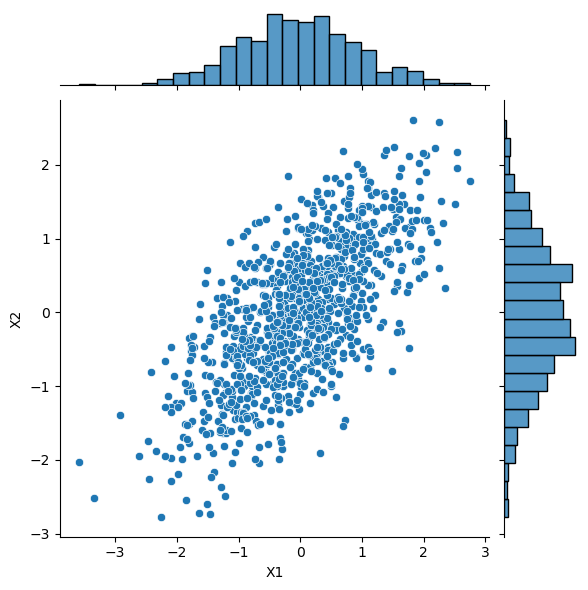

In [10]:
# Visualize the distribution of the generated variables
sns.jointplot(x='X1', y='X2', data=df)
plt.show()

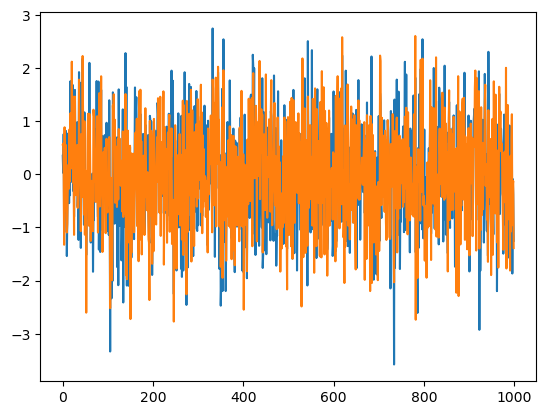

In [11]:
# Visualize the generated variables
plt.plot(df)

Correlation matrix:
          X1        X2        X3
X1  1.000000  0.796360  0.586228
X2  0.796360  1.000000  0.682087
X3  0.586228  0.682087  1.000000


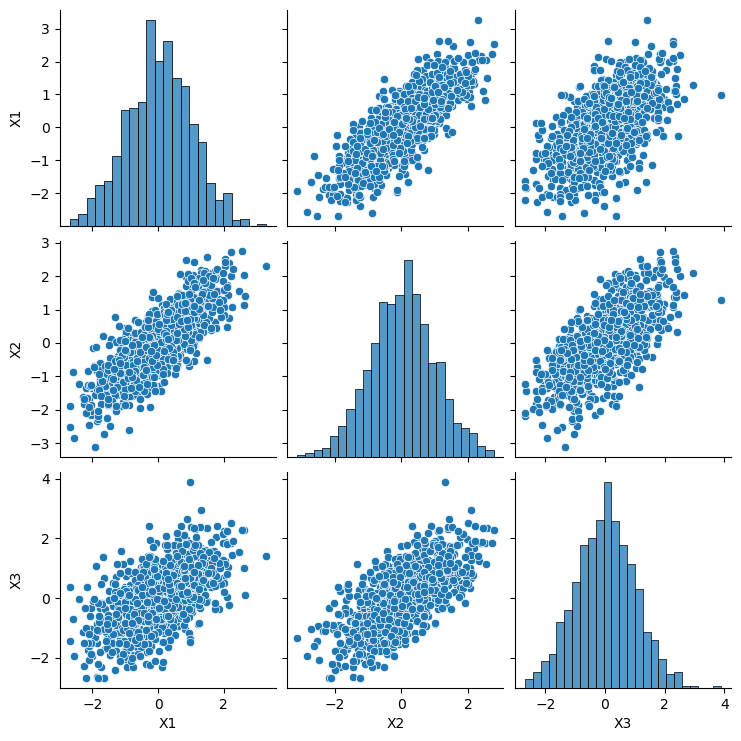

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def generate_correlated_random_variables(mean, covariance, num_samples):
    L = np.linalg.cholesky(covariance)
    normal_samples = np.random.normal(size=(num_samples, covariance.shape[0]))
    return mean + np.dot(normal_samples, L.T)

mean = [0, 0, 0]
covariance = np.array([[1, 0.8, 0.6], [0.8, 1, 0.7], [0.6, 0.7, 1]])
num_samples = 1000
num_variables = covariance.shape[0]

samples = generate_correlated_random_variables(mean, covariance, num_samples)
df = pd.DataFrame(samples, columns=['X' + str(i) for i in range(1, num_variables + 1)])

# Check the correlation of the generated variables
correlation = df.corr()
print("Correlation matrix:")
print(correlation)

# Visualize the distribution of the generated variables
sns.pairplot(df)
plt.show()


Enter the number of variables: 3
Enter the correlation between X1 and X2: 0.3
Enter the correlation between X1 and X3: 0.5
Enter the correlation between X2 and X3: 0.6
Correlation matrix:
          X1        X2        X3
X1  1.000000  0.306184  0.511515
X2  0.306184  1.000000  0.604964
X3  0.511515  0.604964  1.000000


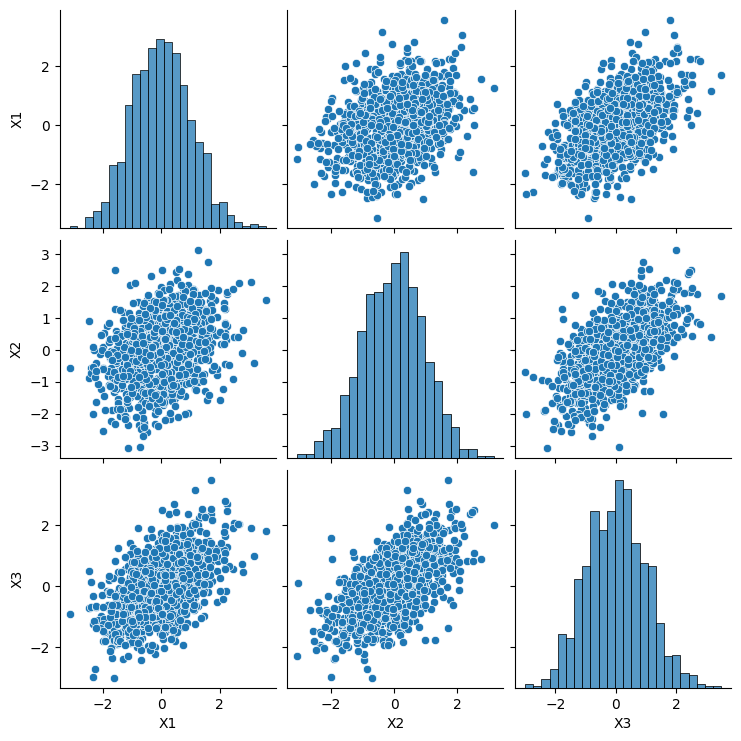

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def generate_correlated_random_variables(mean, covariance, num_samples):
    L = np.linalg.cholesky(covariance)
    normal_samples = np.random.normal(size=(num_samples, covariance.shape[0]))
    return mean + np.dot(normal_samples, L.T)

def generate_covariance_matrix(num_variables, correlations):
    covariance = np.zeros((num_variables, num_variables))
    for i in range(num_variables):
        for j in range(i, num_variables):
            if i == j:
                covariance[i, j] = 1
            else:
                covariance[i, j] = correlations[i][j - i - 1]
                covariance[j, i] = correlations[i][j - i - 1]
    return covariance

def main():
    num_variables = int(input("Enter the number of variables: "))
    mean = [0] * num_variables
    correlations = []
    for i in range(num_variables):
        row = []
        for j in range(i + 1, num_variables):
            row.append(float(input(f"Enter the correlation between X{i + 1} and X{j + 1}: ")))
        correlations.append(row)
    covariance = generate_covariance_matrix(num_variables, correlations)
    
    try:
        np.linalg.cholesky(covariance)
    except np.linalg.LinAlgError:
        print("The covariance matrix is not positive definite.")
        return

    num_samples = 1000
    samples = generate_correlated_random_variables(mean, covariance, num_samples)
    df = pd.DataFrame(samples, columns=['X' + str(i + 1) for i in range(num_variables)])

    # Check the correlation of the generated variables
    correlation = df.corr()
    print("Correlation matrix:")
    print(correlation)

    # Visualize the distribution of the generated variables
    sns.pairplot(df)
    plt.show()

if __name__ == '__main__':
    main()


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def generate_correlated_random_variables(mean, covariance, num_samples):
    L = np.linalg.cholesky(covariance)
    normal_samples = np.random.normal(size=(num_samples, covariance.shape[0]))
    return mean + np.dot(normal_samples, L.T)

def generate_covariance_matrix(num_variables, correlations):
    covariance = np.zeros((num_variables, num_variables))
    for i in range(num_variables):
        for j in range(i, num_variables):
            if i == j:
                covariance[i, j] = 1
            else:
                covariance[i, j] = correlations[i][j - i - 1]
                covariance[j, i] = correlations[i][j - i - 1]
    return covariance

def is_positive_definite(matrix):
    try:
        np.linalg.cholesky(matrix)
        return True
    except np.linalg.LinAlgError:
        return False

def main():
    num_variables = int(input("Enter the number of variables: "))
    mean = [0] * num_variables
    correlations = []
    for i in range(num_variables):
        row = []
        for j in range(i + 1, num_variables):
            row.append(float(input(f"Enter the correlation between X{i + 1} and X{j + 1}: ")))
        correlations.append(row)
    covariance = generate_covariance_matrix(num_variables, correlations)
    
    while not is_positive_definite(covariance):
        print("The covariance matrix is not positive definite.")
        i = len(correlations) - 1
        j = len(correlations[i]) - 1
        while j < 0:
            i -= 1
            j = len(correlations[i]) - 1
        latest_input = correlations[i][j]
        latest_input = max(0, latest_input - 0.01)
        correlations[i][j] = latest_input
        j -= 1
        covariance = generate_covariance_matrix(num_variables, correlations)
        
    num_samples = 1000
    samples = generate_correlated_random_variables(mean, covariance, num_samples)
    df = pd.DataFrame(samples, columns=['X' + str(i + 1) for i in range(num_variables)])

    # Check the correlation of the generated variables
    correlation = df.corr()
    print("Correlation matrix:")
    print(correlation)

    # Visualize the distribution of the generated variables
    sns.pairplot(df)
    plt.show()

if __name__ == '__main__':
    main()


Enter the number of variables: 3
Enter the correlation between X1 and X2: .2


In [176]:
%reset -f
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import time

In [177]:
def generate_correlated_random_variables(mean, covariance, num_samples):
    L = np.linalg.cholesky(covariance)
    normal_samples = np.random.normal(size=(num_samples, covariance.shape[0]))
    return mean + np.dot(normal_samples, L.T)

In [178]:
def generate_covariance_matrix(num_variables, correlations):
    covariance = np.zeros((num_variables, num_variables))
    for i in range(num_variables):
        for j in range(i, num_variables):
            covariance
            if i == j:
                covariance[i, j] = 1
            else:
                covariance[i, j] = correlations[i][j - i - 1]
                covariance[j, i] = correlations[i][j - i - 1]
    return covariance

In [179]:
def is_positive_definite(matrix):
    try:
        np.linalg.cholesky(matrix)
        return True
    except np.linalg.LinAlgError:
        return False

In [180]:
def loss_function(correlations, num_variables):
    covariance = generate_covariance_matrix(num_variables, correlations)
    if is_positive_definite(covariance):
        return 0
    return 1

In [181]:
num_variables = int(input("Enter the number of variables: "))
mean = [0] * num_variables
correlations = []
correlationi = []
for i in range(num_variables):
    row = []
#        row = np.zeros(num_variables)
#        row[i]=1
    for j in range(i + 1, num_variables):
        row.append(float(input(f"Enter the correlation between X{i + 1} and X{j + 1}: ")))
#            row[j]=(float(input(f"Enter the correlation between X{i + 1} and X{j + 1}: ")))
    correlations.append(row)
    correlationi = correlationi + row

Enter the number of variables: 3
Enter the correlation between X1 and X2: 0.2
Enter the correlation between X1 and X3: 0.5
Enter the correlation between X2 and X3: 0.7


In [182]:
correlations

[[0.2, 0.5], [0.7], []]

In [183]:
correlationi

[0.2, 0.5, 0.7]

In [192]:
    
correlations = np.array(correlations,dtype=object)
#    correlationi = correlations
correlations = correlations.flatten()

In [167]:
covariance = np.zeros((num_variables, num_variables))
for i in range(num_variables):
    for j in range(i, num_variables):
        if i == j:
            covariance[i, j] = 1
        else:
            covariance[i, j] = correlations[i][j-1-i]# - i - 1]
            covariance[j, i] = correlations[i][j-1-i]# - i - 1]
#        print(covariance)
#        print("========")

In [195]:
covariance = generate_covariance_matrix(num_variables, correlations)
covariance

array([[1. , 0.2, 0.5],
       [0.2, 1. , 0.7],
       [0.5, 0.7, 1. ]])

In [196]:
loss_function(correlations, num_variables)


0

In [198]:
res = minimize(loss_function, correlations.flatten(), args=(num_variables,), method='Nelder-Mead', options={'maxiter': 10000})

ValueError: setting an array element with a sequence.

In [143]:
correlations[0][1]

0.3

In [ ]:
correlations = res.x.reshape((num_variables, num_variables - 1))
        covariance = generate_covariance_matrix(num_variables, correlations)
        num_samples = 1000
        samples = generate_correlated_random_variables(mean, covariance, num_samples)
        df = pd.DataFrame(samples, columns=['X' + str(i + 1) for i in range(num_variables)])

        # Check the correlation of the generated variables
        correlation = df.corr()
        print("Correlation matrix:")
        print(correlation)

        # Visualize the distribution of the generated variables
        sns.pairplot(df)
        plt.show()

In [72]:
def main():
    num_variables = int(input("Enter the number of variables: "))
    mean = [0] * num_variables
    correlations = []
    for i in range(num_variables):
        row = []
#        row = np.zeros(num_variables)
#        row[i]=1
        for j in range(i + 1, num_variables):
            row.append(float(input(f"Enter the correlation between X{i + 1} and X{j + 1}: ")))
#            row[j]=(float(input(f"Enter the correlation between X{i + 1} and X{j + 1}: ")))
        correlations.append(row)
    correlations = np.array(correlations, dtype=list)
#    correlationi = correlations
    correlations = correlations.flatten()
   
    start_time = time.time()
    res = minimize(loss_function, correlations, args=(num_variables,), method='Nelder-Mead', options={'maxiter': 10000})
    elapsed_time = time.time() - start_time
    if elapsed_time > 60:
        print("Optimization stopped after 1 minute.")
    else:
        correlations = res.x.reshape((num_variables, num_variables - 1))
        covariance = generate_covariance_matrix(num_variables, correlationi)
        num_samples = 1000
        samples = generate_correlated_random_variables(mean, covariance, num_samples)
        df = pd.DataFrame(samples, columns=['X' + str(i + 1) for i in range(num_variables)])

        # Check the correlation of the generated variables
        correlation = df.corr()
        print("Correlation matrix:")
        print(correlation)

        # Visualize the distribution of the generated variables
        sns.pairplot(df)
        plt.show()

In [75]:
res = minimize(loss_function, correlations, args=(num_variables,), method='Nelder-Mead', options={'maxiter': 10000})

In [65]:
num_variables = int(input("Enter the number of variables: "))
mean = [0] * num_variables
correlations = []
for i in range(num_variables):
    row = np.zeros(num_variables)
    row[i]=1
    for j in range(i + 1, num_variables):
        row[j]=(float(input(f"Enter the correlation between X{i + 1} and X{j + 1}: ")))
    correlations.append(row)
correlations = np.array(correlations).flatten()

Enter the number of variables: 2
Enter the correlation between X1 and X2: 0.1


In [66]:
correlations

array([1. , 0.1, 0. , 1. ])

In [41]:
z=np.array(correlations)

In [42]:
z.flatten()

array([1. , 0.1, 0.2, 0.3, 0.4, 0. , 1. , 0.5, 0.6, 0.7, 0. , 0. , 1. ,
       0.8, 0.9, 0. , 0. , 0. , 1. , 0.1, 0. , 0. , 0. , 0. , 1. ])

In [12]:
correlations


array([list([0.1, 0.2, 0.3, 0.4]), list([0.5, 0.6, 0.7]),
       list([0.8, 0.9]), list([0.1]), list([])], dtype=object)